# Hill Climbing Algorithm 

### 原理可參考 https://www.javatpoint.com/hill-climbing-algorithm-in-ai

<left><img src="https://www.researchgate.net/profile/Burak_Eksioglu/publication/221787181/figure/fig1/AS:393982577266688@1470944174043/Hill-climbing-algorithm.png" />

<left><img src="https://i.stack.imgur.com/HISbC.png" />


# Step 1: Functions that we will use

In [1]:
%matplotlib inline
import sys
import time
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random

# 1 generate random 2 numbers
def ran(domain): # generate two numbers  that in range to  swap  (ex: if answer is [4,7] means city 4 and city 7 seq. order swap)
    num = []
    ok_flag=0
    First = random.randint(1,domain)
    num.append(First)
    Second = random.randint(1,domain)
    
    while(ok_flag==0):
        if Second in num:
            Second=random.randint(1,domain)
        else:
            num.append(Second)
            ok_flag=1
    
    return num

# 2 used in HC_Solve_TSP(advanced) in order to generate 3 random numbers
def ran3num(domain): # generate three numbers  that in range to  swap  (ex: if answer is [4, 1, 5] means city 4 and city 1 , city 5 seq. order swap)
    num = []
    ok_flag1=0
    ok_flag2=0
    First = random.randint(1,domain)
    num.append(First)
    Second = random.randint(1,domain)
    Third = random.randint(1,domain)
    while(ok_flag1==0):
        if Second in num:
            Second=random.randint(1,domain)
        else:
            num.append(Second)
            ok_flag1=1
    while(ok_flag2==0):
        if Third in num:
            Third=random.randint(1,domain)
        else:
            num.append(Third)
            ok_flag2=1
    return num

# 3 used in HC_Solve_TSP(advanced) in order to generate the coordinate in list_origin
def CombinationC32(list_origin):
    list_ran3num = ran3num(51)
    list_ran3num.sort()
    list_ran3 = list_ran3num
    #print('list_ran3: ',list_ran3)
    
    CombinListb = list(itertools.combinations(list_ran3,2))
    #print('CombinListb: ',CombinListb,'\n')
    
    list_coor = []
    for x in CombinListb:
        list_tmp = []
        for y in list_ran3:
            #print(x," ",y)
            if y in x:
                #print(y in x)
                #print(list_origin.index(y))
                list_tmp.append(list_origin.index(y))
        list_coor.append(list_tmp)
    
    return list_coor

# 4 used in HC_Solve_TSP(advanced) in order to swap the number in list_input by using list_coor as index
def SwapC32(list_input,list_coor):
    list_swapped = []
    for x in list_coor:
        #print(x)
        list_copy = list_input[:]
        temp = list_copy[x[0]]
        list_copy[x[0]] = list_input[x[1]]
        list_copy[x[1]] = temp
        #print(list_copy)
        
        list_swapped.append(list_copy)
    return list_swapped

# 5 generate init city sequence
def init(num):
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)
    return seq

# 6 swap 2 cities
def trans(seq):
    ok_flag=0
    temp = seq[:]
    index = ran(len(seq))
    
    while (ok_flag ==0) : 
        if index[0]!=index[1]:
            ok_flag =1
        else:
            index = ran(len(seq))
        
        
    t = temp[index[0]-1]
    temp[index[0]-1] = temp[index[1]-1]
    temp[index[1]-1] = t
    
    return temp

# 7 calculate the distance ex: (x1,y1)&(x2,y2)
def distance(axis):
    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

# 8 calculate the total distance
def evalu(seq,dic):
    dist = 0
    for i in range(len(seq)):
        d = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += distance(d)

    return dist

# 9 determine which is min_seq & evalu
def determine(temp,min_seq,dic):
    if evalu(temp,dic) < evalu(min_seq,dic):
        min_seq = temp[:]
        print(min_seq, evalu(min_seq,dic))
  
    return min_seq,evalu(min_seq,dic)
    
# 10 read the eil51.txt file      
def readfile(dic):
    with open('eil51.txt') as f:
        r = f.read()
        read_line = r.split('\n')               
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()

## function explain and test

### 1. ran() function :  generate two numbers  that in range to  swap  (ex: if answer is [4,7] means city 4 and city 7 seq. order swap)

In [2]:
print(ran(2))


[1, 2]


### 2. init(51) function :  generate an initial city sequence

In [3]:
seq = init(3)
print(seq)

[3, 2, 1]


### 3 function trans(seq) can swap cities

In [4]:
new_seq = trans(seq)
print(new_seq) #it swap 2 random cities

[2, 3, 1]


### function 4 read file eil5 51 cities


In [5]:
### function 4 readfile
dic={}
with open('eil51.txt') as f:
    r=f.read()
    read_line = r.split('\n')              
    print('read_line=',read_line)
    print('len of lines=', len(read_line))
    
    for i in range(len(read_line)):         
        read_element = read_line[i].split()
        dic[int(read_element[0])] = [int(read_element[1])]
        dic[int(read_element[0])].append(int(read_element[2]))
    
    print(dic)
    f.close()

read_line= ['1 37 52', '2 49 49', '3 52 64', '4 20 26', '5 40 30', '6 21 47', '7 17 63', '8 31 62', '9 52 33', '10 51 21', '11 42 41', '12 31 32', '13 5 25', '14 12 42', '15 36 16', '16 52 41', '17 27 23', '18 17 33', '19 13 13', '20 57 58', '21 62 42', '22 42 57', '23 16 57', '24 8 52', '25 7 38', '26 27 68', '27 30 48', '28 43 67', '29 58 48', '30 58 27', '31 37 69', '32 38 46', '33 46 10', '34 61 33', '35 62 63', '36 63 69', '37 32 22', '38 45 35', '39 59 15', '40 5 6', '41 10 17', '42 21 10', '43 5 64', '44 30 15', '45 39 10', '46 32 39', '47 25 32', '48 25 55', '49 48 28', '50 56 37', '51 30 40']
len of lines= 51
{1: [37, 52], 2: [49, 49], 3: [52, 64], 4: [20, 26], 5: [40, 30], 6: [21, 47], 7: [17, 63], 8: [31, 62], 9: [52, 33], 10: [51, 21], 11: [42, 41], 12: [31, 32], 13: [5, 25], 14: [12, 42], 15: [36, 16], 16: [52, 41], 17: [27, 23], 18: [17, 33], 19: [13, 13], 20: [57, 58], 21: [62, 42], 22: [42, 57], 23: [16, 57], 24: [8, 52], 25: [7, 38], 26: [27, 68], 27: [30, 48], 28: [43

### function 5 distance evalu determine
> distance (x,y) to (0,0)

In [6]:
#diff = (x_diff,y_diff)
#def distance(axis):
#    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

diff=[1,1] #dx,dy
distance_test=distance(diff) 

print('test for diff {}  distance_test:{}'.format(diff,distance_test))

print("==================================================================")

seq_test=[2,1,3,4]
dic_test={1: [1, 10], 2: [71, 2],3:[22,2],4:[60,3]}
print('dic_test[seq[0]][0],dic_test[seq[0]][1]==',dic_test[seq_test[0]][0],dic_test[seq_test[0]][1])
print('dic_test',dic_test)
print('seq_test',seq_test)
print('seq_test distance for evalu(seq,dic):',evalu(seq_test,dic_test))

print("==================================================================")

print("============ test 5 times =======")

for i in range(5):
    temp_test =trans(seq_test)
    print('temp_test',temp_test)
    print('temp_test for evalu(temp_test,dic_temp):',evalu(temp_test,dic_test))
    new_seq = determine(temp_test,seq_test,dic_test)
    print('new_seq=',new_seq)




test for diff [1, 1]  distance_test:1.4142135623730951
dic_test[seq[0]][0],dic_test[seq[0]][1]== 71 2
dic_test {1: [1, 10], 2: [71, 2], 3: [22, 2], 4: [60, 3]}
seq_test [2, 1, 3, 4]
seq_test distance for evalu(seq,dic): 141.98638150416207
============ test 5 times =======
temp_test [4, 1, 3, 2]
temp_test for evalu(temp_test,dic_temp): 141.93136918148326
[4, 1, 3, 2] 141.93136918148326
new_seq= ([4, 1, 3, 2], 141.93136918148326)
temp_test [2, 4, 3, 1]
temp_test for evalu(temp_test,dic_temp): 141.98638150416207
new_seq= ([2, 1, 3, 4], 141.98638150416207)
temp_test [1, 2, 3, 4]
temp_test for evalu(temp_test,dic_temp): 216.88261854278235
new_seq= ([2, 1, 3, 4], 141.98638150416207)
temp_test [3, 1, 2, 4]
temp_test for evalu(temp_test,dic_temp): 141.98638150416207
new_seq= ([2, 1, 3, 4], 141.98638150416207)
temp_test [3, 1, 2, 4]
temp_test for evalu(temp_test,dic_temp): 141.98638150416207
new_seq= ([2, 1, 3, 4], 141.98638150416207)


# Step 2: Main Function  把所有code 都放在一起
> 加上 iteration n 次

> 有比較好的就印出

Please enter the iteration: 100


[14, 6, 1, 51, 45, 47, 50, 17, 26, 39, 10, 43, 21, 29, 2, 46, 4, 35, 22, 8, 16, 27, 34, 12, 38, 31, 30, 42, 19, 5, 44, 15, 13, 7, 28, 40, 11, 49, 24, 41, 23, 48, 9, 37, 18, 3, 25, 32, 20, 33, 36] 1629.014732294039
[24, 6, 1, 51, 45, 47, 50, 17, 26, 39, 49, 43, 21, 29, 2, 46, 4, 35, 22, 8, 16, 27, 34, 12, 38, 31, 30, 42, 19, 5, 44, 15, 13, 7, 28, 40, 11, 10, 14, 41, 23, 48, 9, 37, 18, 3, 25, 32, 20, 33, 36] 1627.9336513553362
[14, 6, 1, 51, 45, 47, 50, 17, 26, 39, 49, 43, 21, 29, 2, 46, 4, 35, 22, 8, 18, 27, 34, 12, 38, 31, 30, 42, 19, 5, 44, 15, 13, 7, 28, 40, 11, 10, 24, 41, 23, 48, 9, 37, 16, 3, 25, 32, 20, 33, 36] 1627.6289957124059
[14, 6, 1, 51, 45, 47, 25, 17, 26, 39, 49, 43, 21, 29, 2, 46, 4, 35, 22, 8, 16, 27, 34, 12, 38, 31, 30, 42, 19, 5, 44, 15, 13, 7, 28, 40, 11, 10, 24, 41, 23, 48, 9, 37, 18, 3, 50, 32, 20, 33, 36] 1586.9349589117849
[14, 6, 1, 51, 45, 47, 50, 17, 26, 39, 49, 43, 21, 29, 2, 46, 4, 35, 22, 8, 16, 27, 34, 12, 38, 31, 30, 42, 19, 5, 44, 15, 13, 7, 28, 20, 11,

Text(0, 0.5, 'Distance')

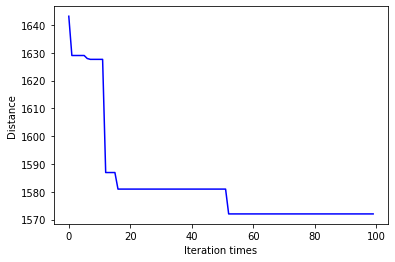

In [7]:

#initial   
num_cities =51
global minVal 
minVal=0
global min_seq
min_seq= init(num_cities)
seq = min_seq
temp = []
dic = {}
readfile(dic)
min_dist = 0
iter_num = input('Please enter the iteration:')
iter_num = int(iter_num)
history_list = []

#Execute
import pandas as pd


for i in range(iter_num): # iteration iter_num =10000次看看
    
    temp = trans(seq)
    min_seq, minVal= determine(temp,min_seq,dic)
    history_list.append(minVal)
    

#Output

print('Final sequence:',min_seq)
print('Final distance:',minVal)

#x = np.linspace(0, iter_num, iter_num)
y = history_list


plt.plot(y,color="blue")
plt.xlabel("Iteration times")
plt.ylabel("Distance")
